# Linear Models

Table of Contents
1. Linear Regression
   1. OLS
   2. Lasso Regression (L1)
   3. Ridge Regression (L2)
2. Logistic Regression


[ ] - How does one hot encoding introduce collinearity? (last one )
How to check for the assumptions?
   [] - QQ Plot Linearity Checking
   [] - Confounding Variable?
   



## Linear Regression

**Assumptions of Linear Regression**
1. Linearity: Linear relationship between dependent and independent variables
2. Homoscedasticity: Constant variance of residuals 
3. Normality: Normal distribution of residuals
4. Non-multicollinearity: No correlation between independent variables
5. Independence: Observations are independent of each other

### OLS (Ordinary Least Squares)

OLS is a linear regression model that minimizes the sum of squared errors. It is the most common method of linear regression. It is also known as the least squares method.

$$ min_{w \in \mathbb{R}^p, b \in \mathbb{R}} \sum_{i=1}^n (w^T x_i + b - y_i)^2 $$

where $\hat{y}_i$ is the predicted value.

### Lasso Regression (L1)

Lasso regression is a linear regression model that minimizes the sum of absolute errors. It is also known as the least absolute deviations method.

$$ min_{w \in \mathbb{R}^p, b \in \mathbb{R}} \sum_{i=1}^n (w^T x_i + b - y_i)^2 + \lambda \sum_{j=1}^p |w_j| $$


where $\hat{y}_i$ is the predicted value and $\lambda$ is the regularization parameter.

### Ridge Regression (L2)

Ridge regression is a linear regression model that minimizes the sum of squared errors. 

$$ min_{w \in \mathbb{R}^p, b \in \mathbb{R}} \sum_{i=1}^n (w^T x_i + b - y_i)^2 + \lambda \sum_{j=1}^p w_j^2 $$

where $\hat{y}_i$ is the predicted value and $\lambda$ is the regularization parameter.


**Some more notes on the differences between OLS, Lasso, and Ridge regression.**
- OLS is not robust to outliers.
- Lasso is used for feature selection. This is because it can shrink the coefficients of the less important features to zero. [For more](https://online.stat.psu.edu/stat508/book/export/html/749)
- Thus, Ridge includes all the features in the final model.
- Lasso is also robust to outliers. [For more](https://stats.stackexchange.com/questions/404495/why-is-lasso-more-robust-to-outliers-compared-to-ridge#:~:text=This%20sensitivity%20of%20the%20penalty,robust%20to%20outliers%20than%20LASSO.&text=Isn't%20shrinking%20the%20coefficient,the%20weight%20by%20large%20amount.)
- The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.
- Both Lasso and Ridge regression are used to reduce the model complexity by shrinking the regression coefficients towards zero. This is called regularization. They trade variance for bias.



---

Evaluation of Linear Models
---

**1. R-squared**

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

where $SS_{residual}$ is the sum of squared residuals and $SS_{totoal}$ is the total sum of squares.

- Measures the "goodness of fit" of the model
- The percentage of the variance in the dependent variable that is explained from the independent variable(s)

The R-squared value $ \rightarrow [0,1]$. 
    The closer the value is to 1, the better the model fits the data.

Limitations of R-squared:
- Sometimes, the R-squared value can be misleading. 
- Adding more features to the model can increase the R-squared value.
- A good model (regularized) model can have a low R-squared value. A bad model (overfit) can have a high R-squared value.

Note: Always check the residual plots to if they are random or not.

**2. Adjusted R-squared**

$$ R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1} $$

where $n$ is the number of observations and $p$ is the number of features.

- Adjusted R-squared penalizes the model for having too many features.


Other Common Evaluation Metrics:
3. Mean Squared Error (MSE)
4. Root Mean Squared Error (RMSE)
5. Mean Absolute Error (MAE)

## Testing the assumptions of Linear Regression

Confounders: Selection Bias, Missing variables, and Measurement Error

Chi-squared tests




More Regularization
---

1. **Elastic Net**
  - Combines L1 and L2 regularization
2. **Subset Selection**
  - Select $k$ features from the $p$ features
3. **Stepwise Selection**
  - Forward Selection
    - Add the best feature one at a time
   - Backward Selection
      -  Remove the worst feature one at a time



## Code <>

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

def plot_linear_model(X, y_hat, y, title):
    plt.figure( figsize=(3,3), dpi=150)
    sns.set_style('darkgrid')
    plt.scatter(X, y, color='blue', marker='o', s=10)
    plt.title(title, fontsize=10)
    plt.ylabel('y')
    plt.xlabel('X')
    plt.plot(X, y_hat, color='red', linewidth=0.5)
    plt.show()

MSE: 0.8078856529274725


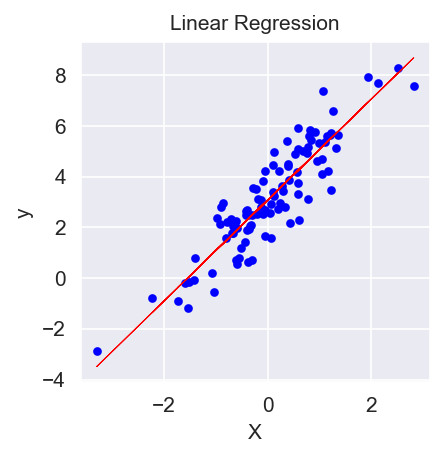

In [79]:
# one dimensional data normally distributed around 0 with a standard deviation of 1
X = np.random.normal(0, 1, 100)
# y = 2x + 3
y = 2 * X + 3
# add noise to the data
y += np.random.normal(0, 1, 100)

model = LinearRegression( )
model.fit(X.reshape(-1, 1), y)

# MSE
print('MSE:', np.mean((model.predict(X.reshape(-1, 1)) - y) ** 2))

# Plot the data and the regression line
plot_linear_model(X, model.predict(X.reshape(-1, 1)), y, 'Linear Regression')

OLS is not robust to outliers. It is also sensitive to the scale of the data. See the example below.

MSE: 5.018156516184353


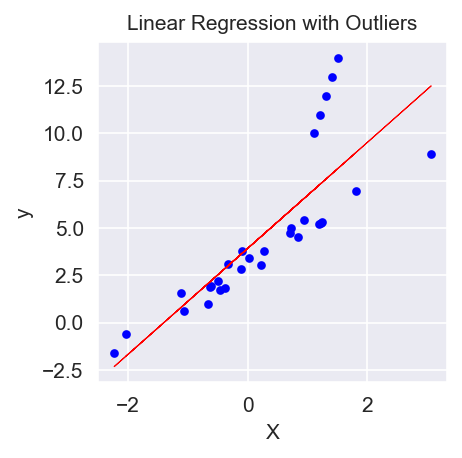

In [78]:
# Add some outliers
X = np.random.normal(0, 1, 25)
y = 2 * X + 3
y += np.random.normal(0, 0.5, 25)
X = np.append(X, [1.1, 1.2, 1.3, 1.4, 1.5])
y = np.append(y, [10, 11, 12, 13, 14])

# Co-efficients
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

# MSE
print('MSE:', np.mean((model.predict(X.reshape(-1, 1)) - y) ** 2))


# Plot the data and the regression line
plot_linear_model(X, model.predict(X.reshape(-1, 1)), y, 'Linear Regression with Outliers')

MSE: 7.814297693456369


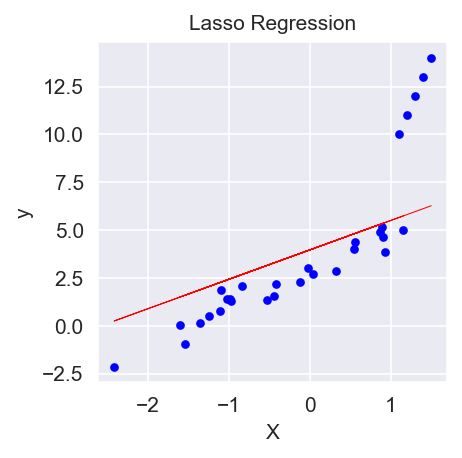

In [75]:
# Lasso Regression

from sklearn.linear_model import Lasso

# fit on X
model = Lasso(alpha=2)
model.fit(X.reshape(-1, 1), y)

# MSE
print('MSE:', np.mean((model.predict(X.reshape(-1, 1)) - y) ** 2))

# Plot the data and the regression line
plot_linear_model(X, model.predict(X.reshape(-1, 1)), y, 'Lasso Regression')


MSE: 5.997116415489926


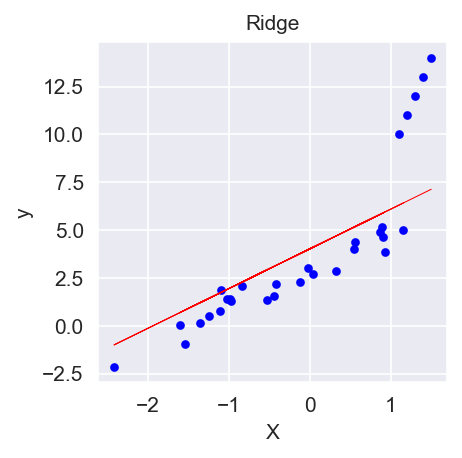

In [74]:
from sklearn.linear_model import Ridge

# fit on X
model = Ridge(alpha=20)
model.fit(X.reshape(-1, 1), y)

# MSE
print('MSE:', np.mean((model.predict(X.reshape(-1, 1)) - y) ** 2))
plot_linear_model(X, model.predict(X.reshape(-1, 1)), y, 'Ridge')